In [1]:
%load_ext jupyter_black

# Pandas 

http://pandas.pydata.org/

Exploratory data analysis, предобработка данных, predictive modeling (в малой степени).
Проекции, слияние, фильтрация, группировка, агрегация, одним словом - **работа с таблицами.**

**Есть смысл читать документацию и думать о наибольшей эффективности выполнения тех или иных операций**.
Так, по-прежнему, если вы пишете цикл, вы что-то делаете не так; векторные операции for the win! И особенно это важно, если ваш код будет затем адаптироваться для [py]Spark. Благодаря DataFrame API Apache Spark, это делается просто.

Дополнительно с pandas можно ознакомиться тут:
1. [Более короткий](https://github.com/jvns/pandas-cookbook)
2. [Более обстоятельный](https://github.com/guipsamora/pandas_exercises/tree/master).

Если будете решать вторую — обязательно пройдите первые пару глав из первой, так как во второй тема индексаций пропущена полностью :)

## Data structures & types

In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
    data=[[1, 2, 3], [4, 5, 6]],
    columns=["A", "B", "C"],
    index=["X", "Y"],
)
df.head()

,A,B,C
X,1,2,3
Y,4,5,6


In [3]:
df["D"] = ["a", "b"]
df

,A,B,C,D
X,1,2,3,a
Y,4,5,6,b


In [5]:
# series -- "колонка" одного типа; можно относиться как к словарю из ИНДЕКСОВ в ЗНАЧЕНИЯ
s = pd.Series([1, 3, 5, 6, 8], name="Some series")

print("Values types: ", s.dtype)
print("Series shape: ", s.shape)
print("Series indeix:", s.index)

# s.values
# s[2:4]
# s.index
# s

Values types:  int64
Series shape:  (5,)
Series indeix: RangeIndex(start=0, stop=5, step=1)


In [10]:
s = pd.Series(
    [1, 3, 5, np.nan, 6, 8, 10],
    name="Some series",
    index=["q", "w", "e", "e", "r", "t", "y"],
)
s
print("Index:", s.index)
print(s[1:5])

print(s["w":"e"])  # обратите внимание!
# 1) порядок -- лексикографический?
# 2) включён ли последний индекс?
# 3) а если сделать s["w":"z"]?

print(s["e":"q"])  # обратите внимание!

Index: Index(['q', 'w', 'e', 'e', 'r', 't', 'y'], dtype='object')
w    3.0
e    5.0
e    NaN
r    6.0
Name: Some series, dtype: float64
w    3.0
e    5.0
e    NaN
Name: Some series, dtype: float64
Series([], Name: Some series, dtype: float64)


In [11]:
# А так ли все работает целочисленными индексами?
t = pd.Series(
    [1, 3, 5, np.nan, 6, 8, 10],
    name="Some series",
    index=[1, 2, 3, 4, 5, 6, 7],
)

# разница, на самом деле, заключена вот здесь, но об этом чуть позже
t.iloc[1:5], t.loc[1:5], s.iloc[1:5],  # s.loc[1:5]

(2    3.0
 3    5.0
 4    NaN
 5    6.0
 Name: Some series, dtype: float64,
 1    1.0
 2    3.0
 3    5.0
 4    NaN
 5    6.0
 Name: Some series, dtype: float64,
 w    3.0
 e    5.0
 e    NaN
 r    6.0
 Name: Some series, dtype: float64)

В пандас есть бесчисленное количество методов для работы с табличными данными, и постоянно добавляется новое, поэтому есть смысл почитать к нему документацию, а не только чужой код. Может быть, так вам удастся избежать переизобретения велосипеда.

Тем, кто работает с реальными временными рядами, могут пригодиться вот такие штучки:

In [12]:
# http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
dates = pd.date_range("20130101", periods=6)  # default frequency measure is 1 day

print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


Потихоньку переходим к главному объекту пандаса: датафреймам.


In [13]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
df = pd.DataFrame(
    data=np.random.randn(6, 4),
    index=dates,
    columns=list("ABCD"),
)

df

,A,B,C,D
2013-01-01,-0.500800,1.968561,1.022768,1.111622
2013-01-02,1.055761,0.517911,1.895920,0.552637
2013-01-03,-1.305963,-0.170473,-0.988813,0.048342
2013-01-04,0.599390,0.641750,-1.725434,-0.092350
2013-01-05,1.119138,0.055218,-0.590256,1.054889
2013-01-06,1.157953,-0.427156,1.266382,0.245332


Ещё один способ задать датафрейм: ключи -- имена колонок, значения -- сами колонки

In [14]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [15]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

## Accessing data
Как посмотреть на набор данных и что-то о нём понять

In [17]:
# df.head(3)
df.tail(2)

,A,B,C,D
2013-01-05,1.119138,0.055218,-0.590256,1.054889
2013-01-06,1.157953,-0.427156,1.266382,0.245332


In [18]:
print(df.index)
print(df.columns)
print(df.values)

df2.values

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')
[[-0.50080047  1.96856095  1.02276824  1.11162242]
 [ 1.05576064  0.51791086  1.89592049  0.55263668]
 [-1.3059634  -0.17047295 -0.98881323  0.04834245]
 [ 0.59938959  0.64175025 -1.72543381 -0.0923502 ]
 [ 1.11913783  0.0552178  -0.59025634  1.05488851]
 [ 1.15795343 -0.42715601  1.26638173  0.24533233]]


array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [19]:
# стандартные статистики по каждой колонке
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.354246,0.430968,0.146761,0.486745
std,1.026706,0.855041,1.443491,0.510574
min,-1.305963,-0.427156,-1.725434,-0.092350
25%,-0.225753,-0.114050,-0.889174,0.097590
50%,0.827575,0.286564,0.216256,0.398985
75%,1.103294,0.610790,1.205478,0.929326
max,1.157953,1.968561,1.895920,1.111622


In [20]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.500800,1.055761,-1.305963,0.599390,1.119138,1.157953
B,1.968561,0.517911,-0.170473,0.641750,0.055218,-0.427156
C,1.022768,1.895920,-0.988813,-1.725434,-0.590256,1.266382
D,1.111622,0.552637,0.048342,-0.092350,1.054889,0.245332


In [21]:
df.T.index, df.index

(Index(['A', 'B', 'C', 'D'], dtype='object'),
 DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
                '2013-01-05', '2013-01-06'],
               dtype='datetime64[ns]', freq='D'))

In [22]:
df.sort_index(axis=1, ascending=False), df

(                   D         C         B         A
 2013-01-01  1.111622  1.022768  1.968561 -0.500800
 2013-01-02  0.552637  1.895920  0.517911  1.055761
 2013-01-03  0.048342 -0.988813 -0.170473 -1.305963
 2013-01-04 -0.092350 -1.725434  0.641750  0.599390
 2013-01-05  1.054889 -0.590256  0.055218  1.119138
 2013-01-06  0.245332  1.266382 -0.427156  1.157953,
                    A         B         C         D
 2013-01-01 -0.500800  1.968561  1.022768  1.111622
 2013-01-02  1.055761  0.517911  1.895920  0.552637
 2013-01-03 -1.305963 -0.170473 -0.988813  0.048342
 2013-01-04  0.599390  0.641750 -1.725434 -0.092350
 2013-01-05  1.119138  0.055218 -0.590256  1.054889
 2013-01-06  1.157953 -0.427156  1.266382  0.245332)

In [23]:
df.sort_values(by="B")

,A,B,C,D
2013-01-06,1.157953,-0.427156,1.266382,0.245332
2013-01-03,-1.305963,-0.170473,-0.988813,0.048342
2013-01-05,1.119138,0.055218,-0.590256,1.054889
2013-01-02,1.055761,0.517911,1.895920,0.552637
2013-01-04,0.599390,0.641750,-1.725434,-0.092350
2013-01-01,-0.500800,1.968561,1.022768,1.111622


## Выборка данных
#### NB!
While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

In [24]:
df["A"]

2013-01-01   -0.500800
2013-01-02    1.055761
2013-01-03   -1.305963
2013-01-04    0.599390
2013-01-05    1.119138
2013-01-06    1.157953
Freq: D, Name: A, dtype: float64

In [25]:
df[["A", "B"]]

,A,B
2013-01-01,-0.500800,1.968561
2013-01-02,1.055761,0.517911
2013-01-03,-1.305963,-0.170473
2013-01-04,0.599390,0.641750
2013-01-05,1.119138,0.055218
2013-01-06,1.157953,-0.427156


In [26]:
df.A

2013-01-01   -0.500800
2013-01-02    1.055761
2013-01-03   -1.305963
2013-01-04    0.599390
2013-01-05    1.119138
2013-01-06    1.157953
Freq: D, Name: A, dtype: float64

In [27]:
df[:]  # по строкам

,A,B,C,D
2013-01-01,-0.500800,1.968561,1.022768,1.111622
2013-01-02,1.055761,0.517911,1.895920,0.552637
2013-01-03,-1.305963,-0.170473,-0.988813,0.048342
2013-01-04,0.599390,0.641750,-1.725434,-0.092350
2013-01-05,1.119138,0.055218,-0.590256,1.054889
2013-01-06,1.157953,-0.427156,1.266382,0.245332


## Выборка по значениям индексов

In [28]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,1.055761,0.517911,1.895920,0.552637
2013-01-03,-1.305963,-0.170473,-0.988813,0.048342
2013-01-04,0.599390,0.641750,-1.725434,-0.092350


In [29]:
# первый индекс
print("First index: " + str(dates[0]))

print(df)

# выбираем всё по этому индексу
print(df.loc[dates[0]])

First index: 2013-01-01 00:00:00
                   A         B         C         D
2013-01-01 -0.500800  1.968561  1.022768  1.111622
2013-01-02  1.055761  0.517911  1.895920  0.552637
2013-01-03 -1.305963 -0.170473 -0.988813  0.048342
2013-01-04  0.599390  0.641750 -1.725434 -0.092350
2013-01-05  1.119138  0.055218 -0.590256  1.054889
2013-01-06  1.157953 -0.427156  1.266382  0.245332
A   -0.500800
B    1.968561
C    1.022768
D    1.111622
Name: 2013-01-01 00:00:00, dtype: float64


## Выборка по порядковым номерам индексов

In [30]:
df.iloc[3:5]

,A,B,C,D
2013-01-04,0.599390,0.641750,-1.725434,-0.092350
2013-01-05,1.119138,0.055218,-0.590256,1.054889


In [31]:
# доступ до отдельного значения
print(df.iat[1, 1])
print(df.iloc[1, 1])  # то же

0.5179108647576018
0.5179108647576018


In [32]:
# выборка по значениям в колонках [ничего не напоминает?]
df[df.A > 0]

,A,B,C,D
2013-01-02,1.055761,0.517911,1.895920,0.552637
2013-01-04,0.599390,0.641750,-1.725434,-0.092350
2013-01-05,1.119138,0.055218,-0.590256,1.054889
2013-01-06,1.157953,-0.427156,1.266382,0.245332


In [33]:
# фильтрация
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]

# то же, что filter по вхождению
# df2[]
df2[df2["E"].isin(["hello", "woow", "three", "one"])]
# df2['E'].isin(['hello', 'woow', 'three', 'one'])

,A,B,C,D,E
2013-01-01,-0.500800,1.968561,1.022768,1.111622,one
2013-01-02,1.055761,0.517911,1.895920,0.552637,one
2013-01-04,0.599390,0.641750,-1.725434,-0.092350,three
2013-01-06,1.157953,-0.427156,1.266382,0.245332,three


## Обновление

In [35]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
df["F"] = s1
df

,A,B,C,D,F
2013-01-01,-0.500800,1.968561,1.022768,1.111622,NaN
2013-01-02,1.055761,0.517911,1.895920,0.552637,1.0
2013-01-03,-1.305963,-0.170473,-0.988813,0.048342,2.0
2013-01-04,0.599390,0.641750,-1.725434,-0.092350,3.0
2013-01-05,1.119138,0.055218,-0.590256,1.054889,4.0
2013-01-06,1.157953,-0.427156,1.266382,0.245332,5.0


In [36]:
# выборка по индексам
df.at["2013-01-04", "A"] = 99.0
df.iat[0, 1] = 999999
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,-0.500800,999999.000000,1.022768,5.0,NaN
2013-01-02,1.055761,0.517911,1.895920,5.0,1.0
2013-01-03,-1.305963,-0.170473,-0.988813,5.0,2.0
2013-01-04,99.000000,0.641750,-1.725434,5.0,3.0
2013-01-05,1.119138,0.055218,-0.590256,5.0,4.0
2013-01-06,1.157953,-0.427156,1.266382,5.0,5.0


In [37]:
# выборка по условию
df[df < -0.5] = 0 * df
df
# df > 0

,A,B,C,D,F
2013-01-01,-0.000000,999999.000000,1.022768,5.0,NaN
2013-01-02,1.055761,0.517911,1.895920,5.0,1.0
2013-01-03,-0.000000,-0.170473,-0.000000,5.0,2.0
2013-01-04,99.000000,0.641750,-0.000000,5.0,3.0
2013-01-05,1.119138,0.055218,-0.000000,5.0,4.0
2013-01-06,1.157953,-0.427156,1.266382,5.0,5.0


In [ ]:
# df[uslovie(df.ix)] = func(df)

In [38]:
df["cat_variable"] = ["Barsik", "Barsik", "Marusya", "Barsik", "Solomon", "Marusya"]

In [39]:
df

,A,B,C,D,F,cat_variable
2013-01-01,-0.000000,999999.000000,1.022768,5.0,NaN,Barsik
2013-01-02,1.055761,0.517911,1.895920,5.0,1.0,Barsik
2013-01-03,-0.000000,-0.170473,-0.000000,5.0,2.0,Marusya
2013-01-04,99.000000,0.641750,-0.000000,5.0,3.0,Barsik
2013-01-05,1.119138,0.055218,-0.000000,5.0,4.0,Solomon
2013-01-06,1.157953,-0.427156,1.266382,5.0,5.0,Marusya


In [40]:
cats_df = pd.get_dummies(df["cat_variable"], prefix="cat")
cats_df

,cat_Barsik,cat_Marusya,cat_Solomon
2013-01-01,True,False,False
2013-01-02,True,False,False
2013-01-03,False,True,False
2013-01-04,True,False,False
2013-01-05,False,False,True
2013-01-06,False,True,False


In [41]:
vals = pd.concat([df.drop(["F", "A", "cat_variable"], axis=1), cats_df], axis=1)
vals

,B,C,D,cat_Barsik,cat_Marusya,cat_Solomon
2013-01-01,999999.000000,1.022768,5.0,True,False,False
2013-01-02,0.517911,1.895920,5.0,True,False,False
2013-01-03,-0.170473,-0.000000,5.0,False,True,False
2013-01-04,0.641750,-0.000000,5.0,True,False,False
2013-01-05,0.055218,-0.000000,5.0,False,False,True
2013-01-06,-0.427156,1.266382,5.0,False,True,False


In [42]:
df.drop(["F", "A", "cat_variable"], axis=1)

,B,C,D
2013-01-01,999999.000000,1.022768,5.0
2013-01-02,0.517911,1.895920,5.0
2013-01-03,-0.170473,-0.000000,5.0
2013-01-04,0.641750,-0.000000,5.0
2013-01-05,0.055218,-0.000000,5.0
2013-01-06,-0.427156,1.266382,5.0


На самом деле, в pandas есть довольно продвинутый sql-like синтаксис, но нам вряд ли он понадобится.

In [43]:
# sample data
orders_data = {
    "customer_id": [1, 2, 3, 1, 2, 3, 4],
    "order_amount": [100, 200, 150, 300, 120, 50, 500],
}
orders = pd.DataFrame(orders_data)

customers_data = {
    "customer_id": [1, 2, 3, 4],
    "customer_name": ["Alice", "Bob", "Charlie", "David"],
    "city": ["New York", "Los Angeles", "New York", "Chicago"],
}
customers = pd.DataFrame(customers_data)

In [45]:
# merge orders with customers on customer_id
merged_df = pd.merge(orders, customers, on="customer_id")
merged_df

,customer_id,order_amount,customer_name,city
0,1,100,Alice,New York
1,2,200,Bob,Los Angeles
2,3,150,Charlie,New York
3,1,300,Alice,New York
4,2,120,Bob,Los Angeles
5,3,50,Charlie,New York
6,4,500,David,Chicago


In [46]:
# Group by city and aggregate the total revenue per city
city_revenue = (
    merged_df.groupby("city")["order_amount"].sum().reset_index(name="total_revenue")
)
city_revenue

,city,total_revenue
0,Chicago,500
1,Los Angeles,320
2,New York,600


In [48]:
# apply a custom function to find the top customer (by total order amount) in each city
def top_customer_in_city(df):
    top_customer = df.groupby("customer_name")["order_amount"].sum().idxmax()
    return top_customer


# group by city and apply the custom function to find the top customer in each city
top_customers = (
    merged_df.groupby("city")
    .apply(top_customer_in_city)
    .reset_index(name="top_customer")
)
top_customers

/tmp/ipykernel_81747/458105633.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(top_customer_in_city)


,city,top_customer
0,Chicago,David
1,Los Angeles,Bob
2,New York,Alice


---
## Упражнения
*Не являются домашкой

In [84]:
import pandas as pd

In [95]:
df = pd.read_csv("data/estonia-passenger-list.csv")
## если видеть не можете "Титаник":
## https://www.kaggle.com/christianlillelund/passenger-list-for-the-estonia-ferry-disaster
## Задание 0
## поисследуйте распределения значений фич --
print(df["Country"].value_counts().head(), "\n")
df.describe()
## Что делает эта цепочка вызовов? Какой объект после каждого? Что показывает?
# print(df.isna().sum())

Country
Sweden     550
Estonia    344
Latvia      28
Finland     16
Russia      14
Name: count, dtype: int64 



,PassengerId,Age,Survived
count,989.000000,989.000000,989.000000
mean,494.992922,44.575329,0.138524
std,285.643660,17.235146,0.345624
min,1.000000,0.000000,0.000000
25%,248.000000,30.000000,0.000000
50%,495.000000,44.000000,0.000000
75%,742.000000,59.000000,0.000000
max,989.000000,87.000000,1.000000


In [96]:
df.head(2)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0


In [97]:
pd.get_dummies(df["Category"])
pd.get_dummies(df["Category"], prefix="Category")

,Category_C,Category_P
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
984,False,True
985,False,True
986,False,True
987,False,True


In [98]:
# Задание 1. А есть ли пропуски

df.isnull().sum()

PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

In [99]:
# Задание 2
# Написать код, заполняющий пропуски в "численных" колонках
# 2a -- значением (-1)
# 2b -- средним значением по колонке

In [100]:
df.head(2)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0


In [101]:
df2 = df.groupby("Lastname").count()["PassengerId"]
df2[df2 > 3]

Lastname
ANDERSSON     15
CARLSSON       4
ERIKSSON      11
GUSTAFSSON     8
GUSTAVSSON     5
JOHANSSON      9
JONSSON        6
KARLSSON       9
KUKK           4
LARSSON        5
LINDSTROM      5
MAGNUSSON      4
NILSSON       12
OLSSON         4
PERSSON        8
PETTERSSON     6
SVENSSON       8
Name: PassengerId, dtype: int64

In [102]:
# Задание 3
# Понять, какие фичи -- номинальные (категориальные) -- без осмысленного порядка над ними.
# Применить к ним пандасовский dummy_encoding


dummies = pd.get_dummies(df[["Country", "Sex", "Category"]])

df = df.drop(["Country", "Sex", "Category"], axis=1)
df[dummies.columns] = dummies
df

,PassengerId,Firstname,Lastname,Age,Survived,Country_Belarus,Country_Canada,Country_Denmark,Country_Estonia,Country_Finland,...,Country_Morocco,Country_Netherlands,Country_Nigeria,Country_Norway,Country_Russia,Country_Sweden,Sex_F,Sex_M,Category_C,Category_P
0,1,ARVID KALLE,AADLI,62,0,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
1,2,LEA,AALISTE,22,0,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
2,3,AIRI,AAVASTE,21,0,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,4,JURI,AAVIK,53,0,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
4,5,BRITTA ELISABET,AHLSTROM,55,0,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,985,ANNA INGRID BIRGITTA,OSTROM,60,0,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
985,986,ELMAR MIKAEL,OUN,34,1,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
986,987,ENN,QUNAPUU,77,0,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
987,988,LY,GUNAPUU,87,0,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True


In [103]:
df = df.drop(["PassengerId", "Firstname", "Lastname"], axis=1)
df

,Age,Survived,Country_Belarus,Country_Canada,Country_Denmark,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Great Britain,...,Country_Morocco,Country_Netherlands,Country_Nigeria,Country_Norway,Country_Russia,Country_Sweden,Sex_F,Sex_M,Category_C,Category_P
0,62,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
1,22,0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,21,0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,53,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
4,55,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,60,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
985,34,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
986,77,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
987,87,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True


In [104]:
# df["Age"] = (df["Age"] - df["Age"].min()) / (df["Age"].max() - df["Age"].min())
df["Age"] = (df["Age"] - df["Age"].mean()) / (df["Age"].std())
df["Age"].mean(), df["Age"].std()

(np.float64(1.3291244298849194e-16), np.float64(1.0))

In [83]:
df["Age"].min(), df["Age"].max()

(np.float64(0.0), np.float64(1.0))

In [ ]:
# Задание 4
# Нормализуйте средствами pandas (нельзя использовать sklearn) отдельно 
# каждую колонку -- с возрастом и со стоимостью билета
# 5a. min-max scaling
# 5b. вычесть среднее и разделить на стандартное отклонение

<Axes: xlabel='Sex_M'>

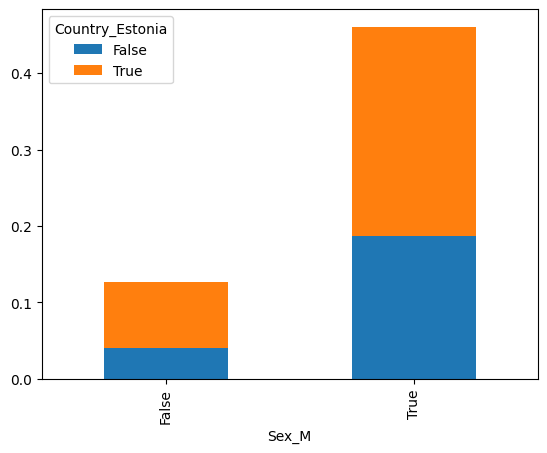

In [116]:
# Задание 5
# Постройте
df.pivot_table("Survived", "Sex_M", "Country_Estonia").plot(kind="bar", stacked=True)
# Погуглите, что это? О чём нам говорит этот график?

In [ ]:
# Задание 6
# Для каждой фичи, кажущейся вам полезной, постройте гистограмму с помощью pandas-hist

**P.S.** Задачи, похожие на эти упражнения, в мире машинного обучения и статистики называются Exploratory Data Analysis (EDA). Наш курс смещен в сторону теории обучения, и заниматься подобным мы больше не будем. Тем, кому надо, советую пройти курсы по feature engineering, data visualization, & data cleaning в Kaggle Learn.


## Задача 4. Split.

Реализуйте разбиение датасета на train, test и val при помощи pandas и без использования циклов на Python. Разбиение должно быть стратифицировано по колонкам, данные должны быть перемешаны. Подробно объясните и/или прокомментируйте, почему ваш код делает то, что нужно.

In [ ]:
def split_stratified(df, stratify_clumns, train_frac=0.6, val_frac=0.2):
    ...

train, val, test = split_stratified(df, ['Category', 'Survived'])



---
This notebook is basen on Anton Alekseev's practical lessons at MCS SPBU and pandas documentation.